# Data Visualization

- Nama: Sukma Rizki Andiantiko S

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from textwrap import wrap
import numpy as np

# please import as much as you need

In [2]:
# read your data

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Jumlah pelanggan dilihat dari tipe kontrak?

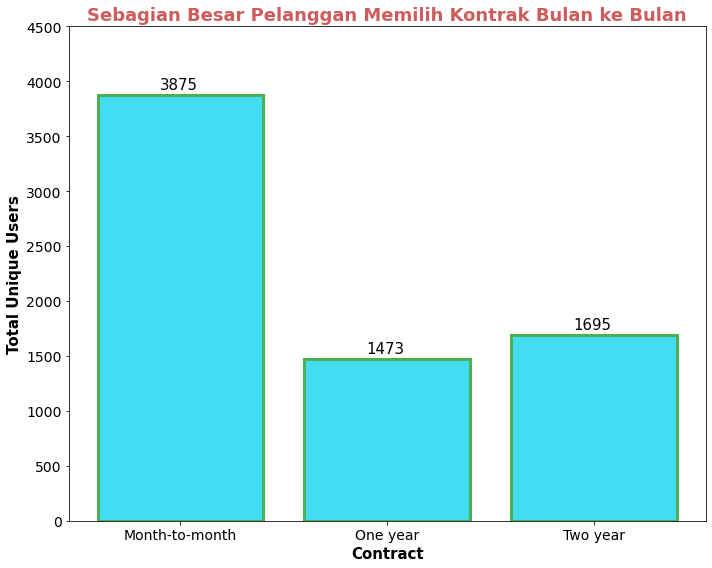

In [4]:
dfg = df.groupby(['Contract'])['customerID'].nunique().reset_index(name='unique_customers')

x = dfg['Contract']
y = dfg['unique_customers']

plt.figure(figsize=(10,8))
barh = plt.bar(x=x, height=y, data=dfg, 
       color = '#42DDF5', # bar colors
       edgecolor= '#4CAF50', # edge bar colors
       linewidth = 3) # line width of bar

plt.xlabel('Contract', fontsize=15, fontweight='bold') # x axis label
plt.ylabel('Total Unique Users', fontsize=15, fontweight='bold') # y axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

x_numbers = range(len(x))
for i in x_numbers:
    plt.text(x = x_numbers[i]-0.1 , y = y[i]+50, s = round(y[i], 2), size = 15) # add data points

plt.title('Sebagian Besar Pelanggan Memilih Kontrak Bulan ke Bulan', color='indianred', fontsize=18, fontweight='bold')
plt.ylim(0, 4500)
plt.tight_layout()

## Apakah kebanyakan dari customer pria churn?

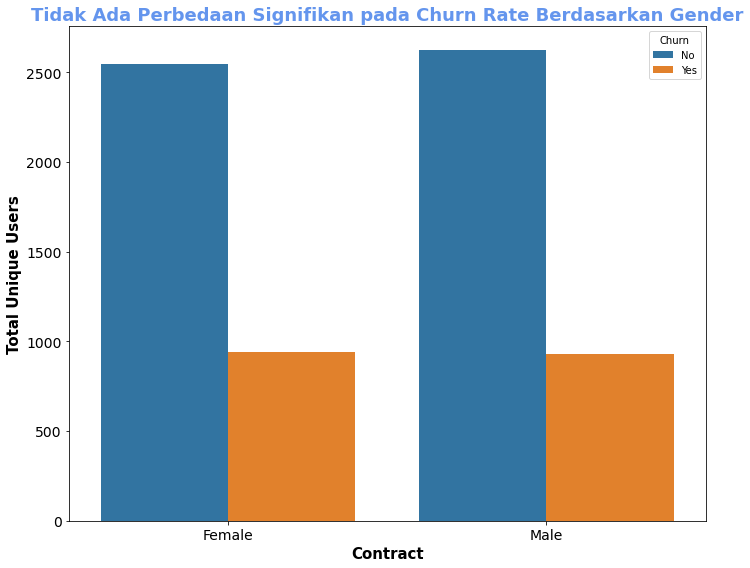

In [5]:
plt.figure(figsize=(10,8))
sns.countplot(x='gender', hue='Churn', data=df)

plt.xlabel('Contract', fontsize=15, fontweight='bold') # x axis label
plt.ylabel('Total Unique Users', fontsize=15, fontweight='bold') # y axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

plt.title('Tidak Ada Perbedaan Signifikan pada Churn Rate Berdasarkan Gender',color='cornflowerblue',fontsize=18,fontweight='bold')
plt.tight_layout()


## Mencari rata2 payment method yang memiliki monthly charge terbesar per customernya
Menggunakan groupby payment method terhadap monthly charge dengan aggregate function rata-rata

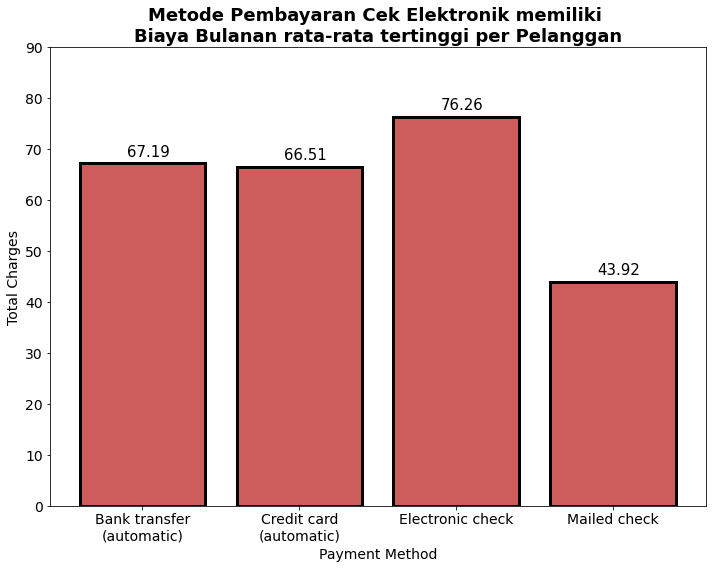

In [6]:
# your code goes here!
import matplotlib.ticker as mticker
dfg = df.groupby(['PaymentMethod'])['MonthlyCharges'].mean().reset_index(name='MonthlyCharges')

x = dfg['PaymentMethod']
y = dfg['MonthlyCharges']

fig, ax = plt.subplots(figsize=(10,8))
ax.bar(x=x, height=y, data=dfg, 
       color = 'indianred', # bar colors
       edgecolor= 'black', # edge bar colors
       linewidth = 3) # line width of bar

ax.set_title('Metode Pembayaran Cek Elektronik memiliki \nBiaya Bulanan rata-rata tertinggi per Pelanggan',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Total Charges', fontsize=14) # y axis label
ax.set_xlabel('Payment Method', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

label = list(dfg['PaymentMethod'].unique())
labela = [ '\n'.join(wrap(l, 20)) for l in label]
ticks_loc = ax.get_xticks()
ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_xticklabels(labela)

x_numbers = range(len(x))
for i in x_numbers:
    ax.text(x = x_numbers[i]-0.1 , y = y[i]+1.5, s = round(y[i], 2), size = 15) # add data points
    
ax.set_ylim(0, 90)
plt.tight_layout()

Jadi, dari plot di atas, dapat disimpulkan bahwa <br>
Rata-rata biaya bulanan tertinggi ada pada metode pembayaran electronic check, sedangkan yang paling rendah pada metode pembayaran mailed check

## Jumlah customer dilihat dari tenure group

Tenure group:
- low_tenure: User dengan tenure < 21 bulan
- medium_tenure: User dengan tenure 21 - 40 bulan
- high_tenure: User dengan tenure > 40 bulan
<br>
------------------------------------------------------------------------------------
- Memotong data integer menjadi group categorical dengan numpy.where atau pandas.cut

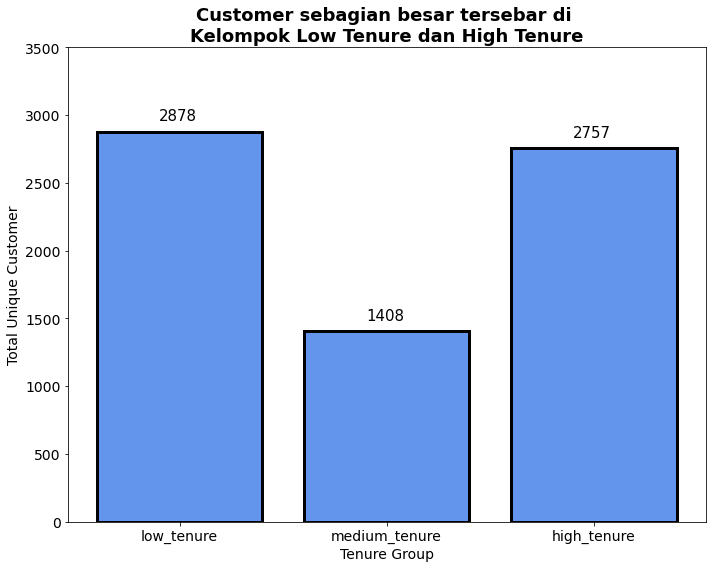

In [7]:
dfa = df.copy()
dfa['tenure_group'] = pd.cut(dfa['tenure'], bins=[0, 20, 40, max(dfa['tenure'])], 
                             labels=['low_tenure', 'medium_tenure', 'high_tenure'], include_lowest=True)

dfg = dfa.groupby(['tenure_group'])['customerID'].nunique().reset_index(name='unique_customer')

x = dfg['tenure_group']
y = dfg['unique_customer']

fig, ax = plt.subplots(1, 1, figsize=(10,8))
ax.bar(x=x, height=y, data=dfg, 
       color = 'cornflowerblue', # bar colors
       edgecolor= 'black', # edge bar colors
       linewidth = 3) # line width of bar


ax.set_title('Customer sebagian besar tersebar di \nKelompok Low Tenure dan High Tenure',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Total Unique Customer', fontsize=14) # y axis label
ax.set_xlabel('Tenure Group', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

    
x_numbers = range(len(x))
for i in x_numbers:
    ax.text(x = x_numbers[i]-0.1 , y = y[i]+80, s = round(y[i], 2), size = 15) # add data points
    
ax.set_ylim(0, 3500)
plt.tight_layout()

Jadi, dari plot di atas, kami menyimpulkan bahwa <br>
Kebanyakan Pelanggan Telco memiliki masa berlangganan kurang dari 20 bulan atau lebih dari 41 bulan

## Mencari mayoritas pelanggan PhoneService dari kalangan Senior Citizen atau Non Senior Citizen

In [9]:
# your code goes here!
dfs1 = df.groupby(['SeniorCitizen', 'PhoneService'])['customerID'].nunique().reset_index(name='UniqueCustomer')
dfs2 = df.groupby(['SeniorCitizen'])['customerID'].nunique().reset_index(name='AllUniqueCustomer')

dfs = dfs1.merge(dfs2, how = 'inner', on='SeniorCitizen')
dfs['PercentUniqueCustomer'] = round(dfs['UniqueCustomer']*100.0/dfs['AllUniqueCustomer'], 2) 

dfs.head()

,SeniorCitizen,PhoneService,UniqueCustomer,AllUniqueCustomer,PercentUniqueCustomer
0,0,No,578,5901,9.79
1,0,Yes,5323,5901,90.21
2,1,No,104,1142,9.11
3,1,Yes,1038,1142,90.89


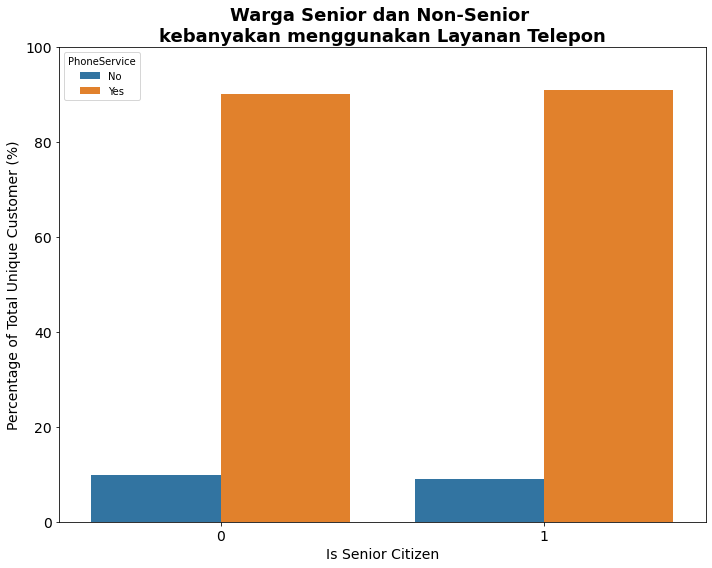

In [11]:
plt.figure(figsize=(10,8))
sns.barplot(x='SeniorCitizen', y='PercentUniqueCustomer', hue='PhoneService', data=dfs)

plt.title("Warga Senior dan Non-Senior \nkebanyakan menggunakan Layanan Telepon",color='black',fontsize=18,fontweight='bold')
plt.ylabel('Percentage of Total Unique Customer (%)', fontsize=14) # y axis label
plt.xlabel('Is Senior Citizen', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.ylim(0,100)

plt.tight_layout()

Jadi, dari plot di atas, dapat disimpulkan bahwa <br>
Baik warga Senior maupun warga non-senior kebanyakan menggunakan layanan telepon

## Melihar Distribusi dari TotalCharge?

- Ubah datatype TotalCharge dari object ke int atau float

Text(0.5, 1.0, 'Distribution of TotalCharge')

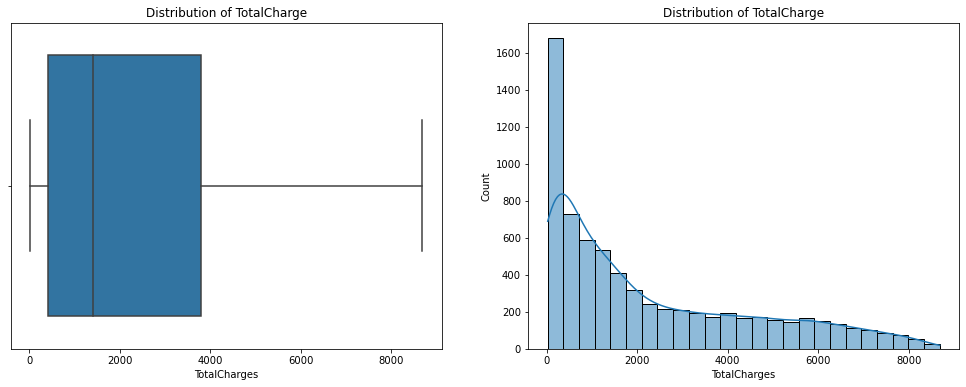

In [12]:
# your code goes here!
dfa =df.copy()
dfa['TotalCharges'] = pd.to_numeric(dfa['TotalCharges'], errors='coerce')
dfa.dropna(subset=['TotalCharges'], inplace=True)

fig, axes = plt.subplots(1,2, figsize=(17,6))

plt.sca(axes[0])
sns.boxplot(x="TotalCharges", data=dfa)
plt.title('Distribution of TotalCharge')

plt.sca(axes[1])
sns.histplot(data=dfa["TotalCharges"],kde=True)

plt.title('Distribution of TotalCharge')


<Figure size 720x576 with 0 Axes>

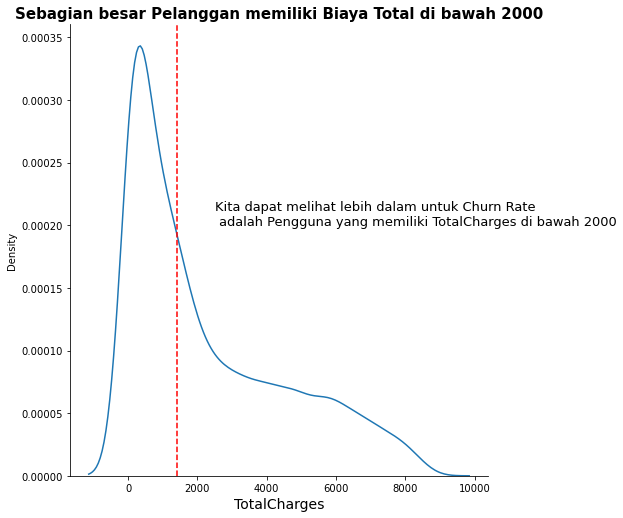

In [15]:
dfa = df.copy()
dfa['TotalCharges'] = pd.to_numeric(dfa['TotalCharges'], errors='coerce') # merubah data string to numerical
dfa.dropna(subset=['TotalCharges'], inplace=True) # membuang data null

plt.figure(figsize=(10,8))
sns.displot(dfa['TotalCharges'], kind="kde", height=7)

# plt.axvline(2000, linestyle='--', color='red')
plt.axvline(np.quantile(dfa['TotalCharges'], 0.5), linestyle='--', color='red')
plt.title('Sebagian besar Pelanggan memiliki Biaya Total di bawah 2000', fontsize=15, fontweight='bold')
plt.xlabel('TotalCharges', fontsize=14)
plt.text(2500, 0.0002, s='Kita dapat melihat lebih dalam untuk Churn Rate \n adalah Pengguna yang memiliki TotalCharges di bawah 2000',
        fontsize=13);

Jadi, dari plot di atas, dapat disimpulkan bahwa <br>
Distribusi data dari TotalCharger Negative Skewed <br>
Kebanyakan dari pelanggan Telco memiliki total biaya dibawah $2000


# Intermediate

## Apakah customer yang memiliki monthly charges yang tinggi cenderung churn?

Ditunjukan melalui distribusi data

In [14]:
df_Churn_yes=df[df['Churn']=='Yes'].copy()
df_Churn_no=df[df['Churn']=='No'].copy()

Text(0.5, 1.0, 'Most Churn of Tenure')

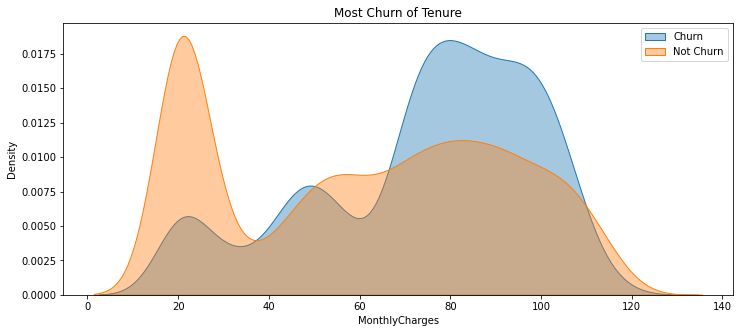

In [15]:
fig, axes = plt.subplots(figsize=(12,5))

sns.kdeplot(df_Churn_yes['MonthlyCharges'],shade=True,alpha=0.4,legend=True,label='Churn')
sns.kdeplot(df_Churn_no['MonthlyCharges'],shade=True,alpha=0.4,legend=True,label='Not Churn')
plt.legend()
plt.title('Most Churn of Tenure')


Jadi, dari plot di atas, dapat disimpulkan bahwa <br>
Kebanyakan dari pelanggan yang berhenti berlangganan (churn) memiliki biaya bulanan yang tinggi, lebih dari $ 60

## Bagaimana pengaruh memiliki partner & dependents terhadap tingkat churn customer?


In [20]:
dfa = df.copy()
dfa['partner_dependents'] = dfa['Partner']+"-"+dfa['Dependents'] 

dfa['partner_dependents'].value_counts()

No-No      3280
Yes-Yes    1749
Yes-No     1653
No-Yes      361
Name: partner_dependents, dtype: int64

In [21]:
dfat = dfa.groupby(['partner_dependents', 'Churn'])['customerID'].nunique()

dfat_pr = dfat.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index(name='percentage')
df_viz = dfat_pr.merge(dfat.reset_index(), how = 'inner', on = ['partner_dependents', 'Churn'])
df_viz

,partner_dependents,Churn,percentage,customerID
0,No-No,No,65.762195,2157
1,No-No,Yes,34.237805,1123
2,No-Yes,No,78.670360,284
3,No-Yes,Yes,21.329640,77
4,Yes-No,No,74.591652,1233
5,Yes-No,Yes,25.408348,420
6,Yes-Yes,No,85.763293,1500
7,Yes-Yes,Yes,14.236707,249


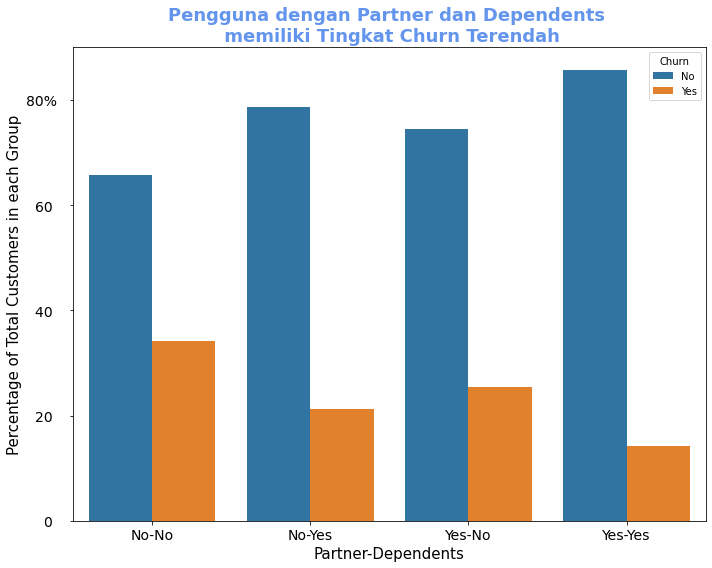

In [23]:
import matplotlib.ticker as mticker
plt.figure(figsize=(10,8))
axt = sns.barplot(x='partner_dependents', y='percentage', hue='Churn', data=df_viz)

plt.title('Pengguna dengan Partner dan Dependents \n memiliki Tingkat Churn Terendah',color='cornflowerblue',fontsize=18,fontweight='bold')
plt.ylabel('Percentage of Total Customers in each Group', fontsize=15) # y axis label
plt.xlabel('Partner-Dependents', fontsize=15) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14);

ticks_loc = axt.get_yticks()
axt.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
axt.set_yticklabels(labels =  ['0   ', '20   ', '40   ', '60   ', '80%  ', 100])

plt.tight_layout()

Jadi, dari plot di atas, dapat disimpulkan bahwa... <br>
Pelanggan yang memiliki pasangan dan tanggungan memiliki tingkat churn yang paling rendah, sedangkan pelanggan yang tidak memiliki keduanya memiliki tingkat churn yang paling tinggi 

## Buatlah satu insight dari data telco customer, dan sertakan storyline pada visualisasi tersebut! dengan hanya memanfaatkan atribut PaymentMethod, CustomerID, dan Churn!

In [25]:
df_churn = df[df['Churn'] == 'Yes']
df_churn = df_churn.copy()

In [26]:
def label_status(row):
    if (row['SeniorCitizen'] == 1 or row['Partner'] == 'Yes' or row['Dependents'] == 'Yes') == True:
        return 'Married'
    return 'Single'

df_churn['status'] = df_churn.apply(lambda row: label_status(row), axis=1)

In [27]:
def label_group_tenure(row):
    if (row['tenure'] <= 12) == True:
        return 'Tenure Below 1 year'
    return 'Tenure Over 1 year'

df_churn['tenure group'] = df_churn.apply(lambda row: label_group_tenure(row), axis=1)

In [28]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,status,tenure group
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Single,Tenure Below 1 year
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Single,Tenure Below 1 year
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,Single,Tenure Below 1 year
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Married,Tenure Over 1 year
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,Single,Tenure Over 1 year


In [29]:
df_tenure = pd.DataFrame(df_churn.groupby(['tenure'])['Churn'].count()).reset_index()
df_tenure_group = pd.DataFrame(df_churn.groupby(['tenure group'])['Churn'].count()).reset_index()

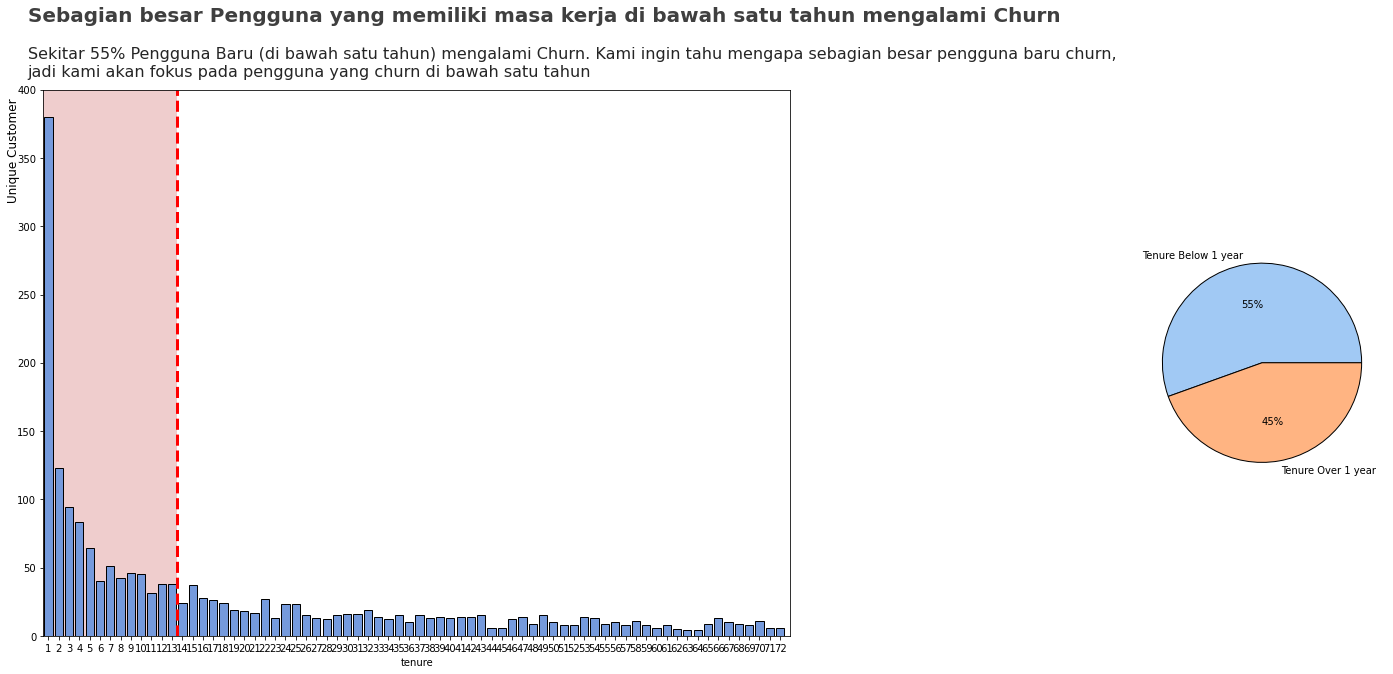

In [33]:
# Create figure
fig, ax = plt.subplots(1, 2, figsize=(20,10), gridspec_kw={'width_ratios': [3, 1]})

# Plot graph
sns.barplot(ax=ax[0], x="tenure", y="Churn", data=df_tenure, 
            color='cornflowerblue', edgecolor='black')

ax[1].pie(df_tenure_group['Churn'], labels = df_tenure_group['tenure group'], colors = sns.color_palette('pastel'),
          wedgeprops={"edgecolor":"k"}, autopct='%.0f%%')

ax[0].yaxis.label.set_visible(False)
ax[0].text(-4, 320, s="Unique Customer", fontsize=12, rotation=90)
ax[0].set_ylim(0,400)
ax[0].set_xlim(-0.5,72)
ax[0].stackplot(np.arange(-0.5, 13, 0.5), [[400]], colors=('indianred',), alpha=0.3)
ax[0].axvline(x=12.5, color='red', linestyle='--', linewidth=3)
ax[0].text(x = -2, y = 450, s = "Sebagian besar Pengguna yang memiliki masa kerja di bawah satu tahun mengalami Churn",
               fontsize = 20, weight = 'bold', alpha = .75)
ax[0].text(x = -2, y = 410,
               s = 'Sekitar 55% Pengguna Baru (di bawah satu tahun) mengalami Churn. Kami ingin tahu mengapa sebagian besar pengguna baru churn, \njadi kami akan fokus pada pengguna yang churn di bawah satu tahun',
              fontsize = 16, alpha = .85)

plt.tight_layout(pad=3.0)


In [35]:
df_churn_one_year = df_churn[df_churn['tenure group'] == 'Tenure Below 1 year'].reset_index().drop('index',axis=1)

df_contract = pd.DataFrame(df_churn_one_year.groupby(['Contract', 'status'])['Churn'].count()).reset_index()
df_status = pd.DataFrame(df_churn_one_year.groupby(['status'])['Churn'].count()).reset_index()

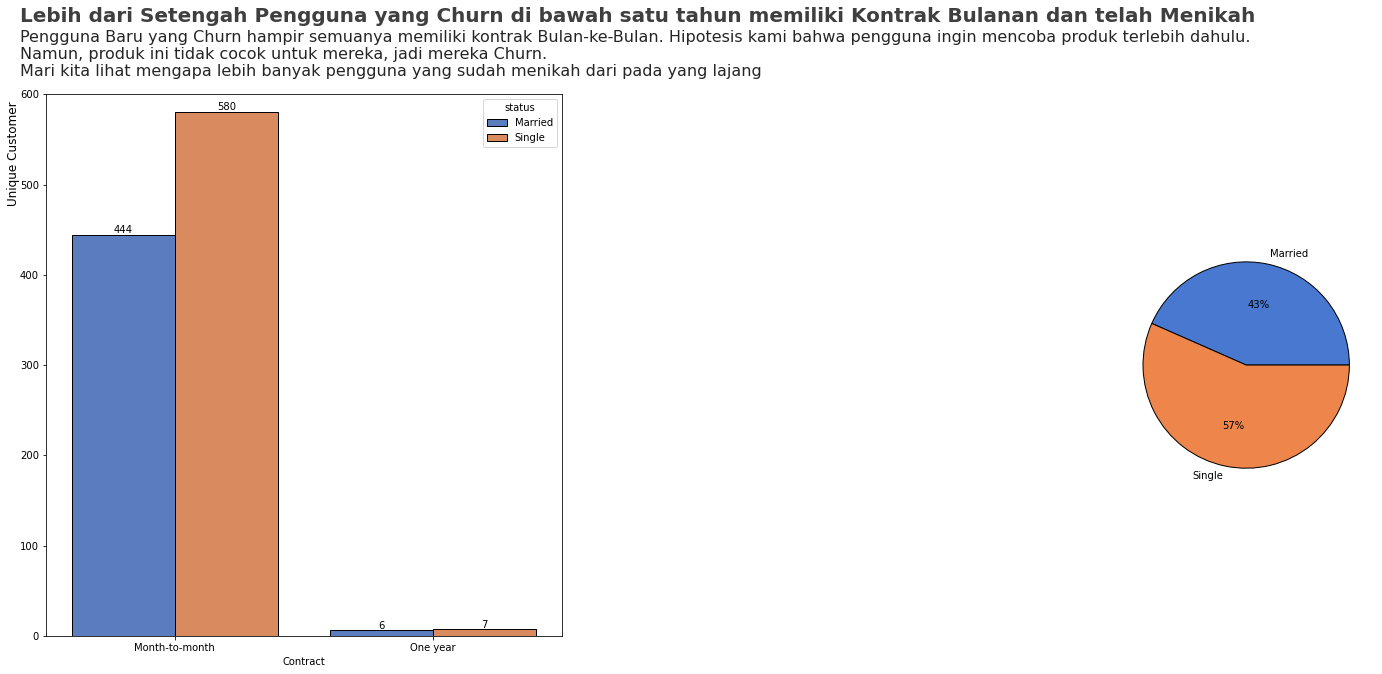

In [36]:
# Create figure
fig, ax = plt.subplots(1, 2, figsize=(20,10), gridspec_kw={'width_ratios': [2, 1]})

# Plot graph
plt_contract = sns.barplot(ax=ax[0], x="Contract", y="Churn", hue='status', data=df_contract, 
                           palette='muted', edgecolor='black')
for value in plt_contract.containers:

    ax[0].bar_label(value)

ax[1].pie(df_status['Churn'], labels = df_status['status'], colors = sns.color_palette('muted'),
          wedgeprops={"edgecolor":"k"}, autopct='%.0f%%')

ax[0].yaxis.label.set_visible(False)
ax[0].text(-0.65, 480, s="Unique Customer", fontsize=12, rotation=90)
ax[0].set_ylim(0,600)
ax[0].text(x = -0.6, y = 680, s = "Lebih dari Setengah Pengguna yang Churn di bawah satu tahun memiliki Kontrak Bulanan dan telah Menikah",
               fontsize = 20, weight = 'bold', alpha = .75)
ax[0].text(x = -0.6, y = 620,
               s = "Pengguna Baru yang Churn hampir semuanya memiliki kontrak Bulan-ke-Bulan. Hipotesis kami bahwa pengguna ingin mencoba produk terlebih dahulu. \nNamun, produk ini tidak cocok untuk mereka, jadi mereka Churn. \nMari kita lihat mengapa lebih banyak pengguna yang sudah menikah dari pada yang lajang",
              fontsize = 16, alpha = .85)

plt.tight_layout(pad=3.0)


In [37]:
single  = df_churn_one_year[df_churn_one_year['status'] == 'Single']['MonthlyCharges']
married = df_churn_one_year[df_churn_one_year['status'] == 'Married']['MonthlyCharges']

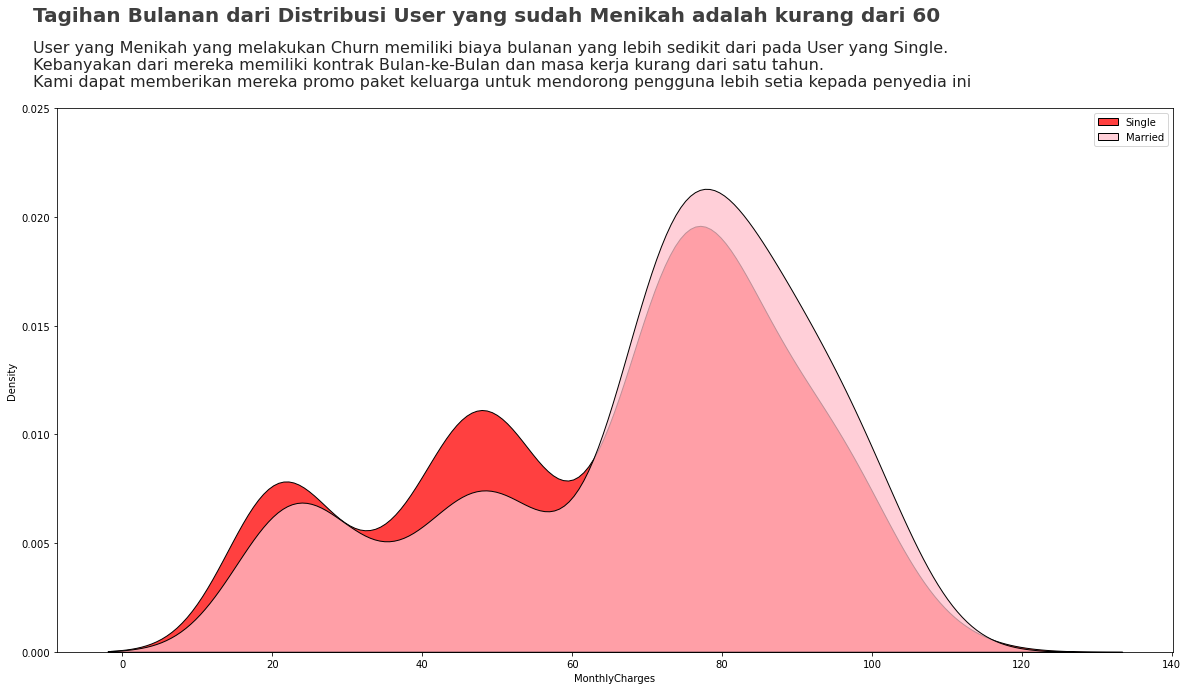

In [44]:
# Create figure
fig, ax = plt.subplots(figsize=(20,10))

# Plot graph
sns.kdeplot(single.dropna(), color= 'red', label= 'Single', multiple="stack")
sns.kdeplot(married.dropna(), color= 'pink', label= 'Married', multiple="stack")

ax.set_ylim(0,0.025)
ax.text(x = -12, y = 0.029, s = "Tagihan Bulanan dari Distribusi User yang sudah Menikah adalah kurang dari 60",
        fontsize = 20, weight = 'bold', alpha = .75)
ax.text(x = -12, y = 0.026,
        s = 'User yang Menikah yang melakukan Churn memiliki biaya bulanan yang lebih sedikit dari pada User yang Single. \nKebanyakan dari mereka memiliki kontrak Bulan-ke-Bulan dan masa kerja kurang dari satu tahun. \nKami dapat memberikan mereka promo paket keluarga untuk mendorong pengguna lebih setia kepada penyedia ini',
        fontsize = 16, alpha = .85)
plt.legend()
